In [55]:
from __future__ import division
import os
import igraph
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats.kde import gaussian_kde
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1 import Grid

# relevant python libraries
execfile('../functions/python_libraries.py')

In [56]:
#reference: http://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html

import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[], plt_name = None ):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    #fig = pyplot.figure(figsize=(5, 5)) # in inches
    plt_name.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    #ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            plt_name.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

In [57]:
import numpy as np
from collections import defaultdict

def assignmentArray_to_lists(assignment_array):
    by_attribute_value = defaultdict(list)
    for node_index, attribute_value in enumerate(assignment_array):
        by_attribute_value[attribute_value].append(node_index)
    return by_attribute_value.values()



In [59]:
num_nodes = 80#400
avg_deg = 6#20

In [60]:
disp_val = 0

(adj_ER, y_ER) = create_affiliation_model_temp(avg_deg,#25,
                                  lambda_block_parameter =1,
                                           dispersion_parameter_vect = np.array([np.array([disp_val, disp_val]),
                                            np.array([disp_val, disp_val])]),
                                  class_size_vect = np.array([num_nodes,num_nodes]))






('p_in: ', 0.037499999999999999)
('p_out: ', 0.037499999999999999)

spot-check average degree: 
5.95

spot-check homophily: 
[0.47972972972972977, 0.54527559055118113]

spot-check monophily: 
[0.0025293578199390037, 0.0]



In [61]:
disp_val = 0
(adj_homophily, y_homophily) = create_affiliation_model_temp(avg_deg,#25,
                                  lambda_block_parameter =1.7,
                                           dispersion_parameter_vect = np.array([np.array([disp_val, disp_val]),
                                            np.array([disp_val, disp_val])]),
                                  class_size_vect = np.array([num_nodes,num_nodes]))





('p_in: ', 0.06375)
('p_out: ', 0.01125)

spot-check average degree: 
5.75

spot-check homophily: 
[0.85526315789473684, 0.85775862068965514]

spot-check monophily: 
[0.015560766141764484, 0.0]



In [62]:
## khop spot-check
k_hop = np.array([1,2,3,4,5])
class_values = np.unique(y_homophily)

prop_same_array = []
for k in k_hop:  
    print k
    adj_amherst_k= np.matrix(adj_homophily)**k
    adj_amherst_k[range(adj_amherst_k.shape[0]),range(adj_amherst_k.shape[0])]=0 ## remove self-loops
                              
    mv_g1 = (adj_amherst_k[y_homophily==class_values[0],:] * np.matrix((y_homophily==class_values[0])+0).T)/np.sum(adj_amherst_k[y_homophily==class_values[0],:],1)
    mv_g2 = (adj_amherst_k[y_homophily==class_values[1],:] * np.matrix((y_homophily==class_values[1])+0).T)/np.sum(adj_amherst_k[y_homophily==class_values[1],:],1)
    proportion_majority_same = np.mean(np.concatenate((np.array(mv_g1).T[0]>np.mean(y_homophily==class_values[0]),
                                                                       np.array(mv_g2).T[0]>np.mean(y_homophily==class_values[1]))))
    prop_same_array.append( proportion_majority_same)

print prop_same_array

1
2
3
4
5
[0.94999999999999996, 0.92500000000000004, 0.93125000000000002, 0.92500000000000004, 0.92500000000000004]


In [66]:
disp_val = 0.02
(adj_monophily, y_monophily) = create_affiliation_model_temp(avg_deg,#45,#25,
                                  lambda_block_parameter =1.0,
                                           dispersion_parameter_vect = np.array([np.array([disp_val, disp_val]),
                                            np.array([disp_val, disp_val])]),
                                  class_size_vect = np.array([num_nodes,num_nodes]))#[550,550]))


('p_in: ', 0.0375)
('p_out: ', 0.037499999999999999)

spot-check average degree: 
6.2375

spot-check homophily: 
[0.50398406374501992, 0.49798387096774188]

spot-check monophily: 
[0.25846644836578075, 0.20183000345781568]



In [67]:
## khop spot-check
k_hop = np.array([1,2,3,4,5])
class_values = np.unique(y_monophily)

prop_same_array = []
for k in k_hop:  
    print k
    adj_amherst_k= np.matrix(adj_monophily)**k
    adj_amherst_k[range(adj_amherst_k.shape[0]),range(adj_amherst_k.shape[0])]=0 ## remove self-loops
                              
    mv_g1 = (adj_amherst_k[y_monophily==class_values[0],:] * np.matrix((y_monophily==class_values[0])+0).T)/np.sum(adj_amherst_k[y_monophily==class_values[0],:],1)
    mv_g2 = (adj_amherst_k[y_monophily==class_values[1],:] * np.matrix((y_monophily==class_values[1])+0).T)/np.sum(adj_amherst_k[y_monophily==class_values[1],:],1)
    proportion_majority_same = np.mean(np.concatenate((np.array(mv_g1).T[0]>np.mean(y_monophily==class_values[0]),
                                                                       np.array(mv_g2).T[0]>np.mean(y_monophily==class_values[1]))))
    prop_same_array.append( proportion_majority_same)


print prop_same_array

1
2
3
4
5
[0.4375, 0.79374999999999996, 0.46250000000000002, 0.75, 0.42499999999999999]


/Users/kristen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide
/Users/kristen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater


In [68]:
adj_ER2 = np.matrix(adj_ER)**2
adj_ER2[range(adj_ER2.shape[0]),range(adj_ER2.shape[0])]=0
adj_ER2 = (adj_ER2 >=1)+0

In [69]:
adj_homophily2 = np.matrix(adj_homophily)**2
adj_homophily2[range(adj_homophily2.shape[0]),range(adj_homophily2.shape[0])]=0
adj_homophily2 = (adj_homophily2 >=1)+0

In [70]:
adj_monophily2 = np.matrix(adj_monophily)**2
adj_monophily2[range(adj_monophily2.shape[0]),range(adj_monophily2.shape[0])]=0
adj_monophily2 = (adj_monophily2 >=1)+0

In [71]:
gender_ER_assignment = y_ER.copy()
gender_ER_lists = assignmentArray_to_lists(gender_ER_assignment)

gender_homophily_assignment = y_homophily.copy()
gender_homophily_lists = assignmentArray_to_lists(gender_homophily_assignment)

gender_monophily_assignment = y_monophily.copy()
gender_monophily_lists = assignmentArray_to_lists(gender_monophily_assignment)

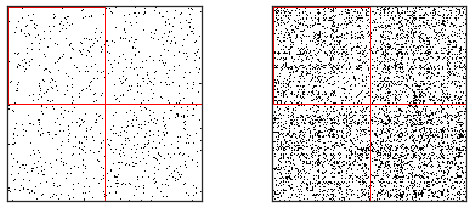

In [72]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))

(V,vect)=np.linalg.eig(adj_ER)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_ER_lists],["red"],ax1)
ax1.set_xticklabels([])
ax1.set_yticklabels([])



(V,vect)=np.linalg.eig(adj_ER2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_ER_lists],["red"], ax2)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.tight_layout()
plt.show()

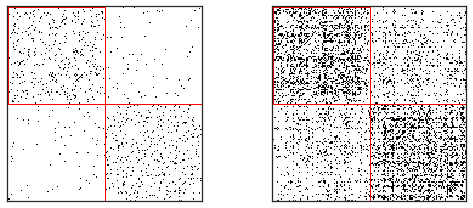

In [73]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))

(V,vect)=np.linalg.eig(adj_homophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_homophily_lists],["red"],ax1)
ax1.set_xticklabels([])
ax1.set_yticklabels([])



(V,vect)=np.linalg.eig(adj_homophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_homophily_lists],["red"], ax2)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.tight_layout()
plt.show()

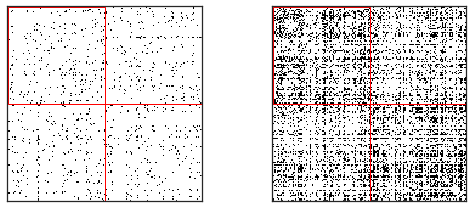

In [74]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=False,
                            figsize=(8, 3))

(V,vect)=np.linalg.eig(adj_monophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_monophily_lists],["red"],ax1)
ax1.set_xticklabels([])
ax1.set_yticklabels([])



(V,vect)=np.linalg.eig(adj_monophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_monophily_lists],["red"], ax2)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.tight_layout()
plt.show()

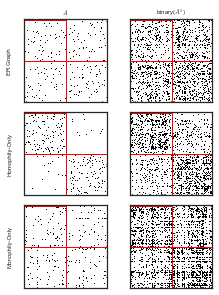

In [75]:
%matplotlib inline
f, axarr = plt.subplots(3, 2, 
                    sharey=False, sharex=False,
                    figsize=(3.46457, 4.2),
                    squeeze = True)

## ER graph
(V,vect)=np.linalg.eig(adj_ER)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_ER_lists],["red"],axarr[0,0])
axarr[0,0].set_xticklabels([])
axarr[0,0].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_ER2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_ER_lists],["red"], axarr[0,1])

axarr[0,1].set_xticklabels([])
axarr[0,1].set_yticklabels([])


## Homophily-Only
(V,vect)=np.linalg.eig(adj_homophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_homophily_lists],["red"],axarr[1,0])
axarr[1,0].set_xticklabels([])
axarr[1,0].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_homophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_homophily_lists],["red"], axarr[1,1])

axarr[1,1].set_xticklabels([])
axarr[1,1].set_yticklabels([])



## Monophily-Only
(V,vect)=np.linalg.eig(adj_monophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_monophily_lists],["red"],axarr[2,0])
axarr[2,0].set_xticklabels([])
axarr[2,0].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_monophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_monophily_lists],["red"], axarr[2,1])
axarr[2,1].set_xticklabels([])
axarr[2,1].set_yticklabels([])
axarr[0,0].set_title('$A$', size = 6)
axarr[0,1].set_title('binary($A^2$)', size = 6)

axarr[0,0].set_ylabel('ER Graph', size = 6)
axarr[1,0].set_ylabel('Homophily-Only',size = 6)
axarr[2,0].set_ylabel('Monophily-Only',size = 6)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.tight_layout()
#plt.show()
pp = PdfPages('../../figures/figure1b.pdf')
pp.savefig(dpi = 300)
pp.close()

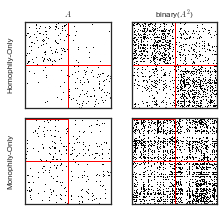

In [76]:
%matplotlib inline
f, axarr = plt.subplots(2, 2, 
                    sharey=False, sharex=False,
                    figsize=(3.46457, 3),
                    squeeze = True,
                       dpi = 300)




## Homophily-Only
(V,vect)=np.linalg.eig(adj_homophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_homophily_lists],["red"],axarr[0,0])
axarr[0,0].set_xticklabels([])
axarr[0,0].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_homophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_homophily_lists],["red"], axarr[0,1])

axarr[0,1].set_xticklabels([])
axarr[0,1].set_yticklabels([])



## Monophily-Only
(V,vect)=np.linalg.eig(adj_monophily)
V_sort = V.copy()
idx = V_sort.argsort()
idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))

#nodes_year_ordered = [node for gender_ER_lists in gender_ER_listss for node in gender_ER_lists]
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), [gender_monophily_lists],["red"],axarr[1,0])
axarr[1,0].set_xticklabels([])
axarr[1,0].set_yticklabels([])



(V,vect)=np.linalg.eig(adj_monophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_monophily_lists],["red"], axarr[1,1])
axarr[1,1].set_xticklabels([])
axarr[1,1].set_yticklabels([])
axarr[0,0].set_title('$A$', size = 8)
axarr[0,1].set_title('binary($A^2$)', size = 8)

#axarr[0,0].set_ylabel('ER Graph', size = 8)
axarr[0,0].set_ylabel('Homophily-Only',size = 8)
axarr[1,0].set_ylabel('Monophily-Only',size = 8)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.tight_layout()
#plt.show()
pp = PdfPages('../../figures/figure1bb.pdf')
pp.savefig(dpi = 300)
pp.close()

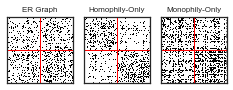

In [77]:
%matplotlib inline
f, axarr = plt.subplots(1, 3, 
                             sharey=False, sharex=False,
                            figsize=(6.69291/2,6.69291/2))

## ER graph
(V,vect)=np.linalg.eig(adj_ER2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_ER==0)+0)))
idx_c1 = np.array(range(np.sum((y_ER==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_ER2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_ER_lists],["red"], axarr[0])

axarr[0].set_xticklabels([])
axarr[0].set_yticklabels([])


## Homophily-Only
(V,vect)=np.linalg.eig(adj_homophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_homophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_homophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_homophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_homophily_lists],["red"], axarr[1])

axarr[1].set_xticklabels([])
axarr[1].set_yticklabels([])



## Monophily-Only
(V,vect)=np.linalg.eig(adj_monophily2)
V_sort = V.copy()
idx = V_sort.argsort()

idx_c0 = np.array(range(np.sum((y_monophily==0)+0)))
idx_c1 = np.array(range(np.sum((y_monophily==1)+0))) + len(idx_c0)
idx1 = sorted(list(idx_c0), key=lambda x: list(idx).index(x))
idx2 = sorted(list(idx_c1), key=lambda x: list(idx).index(x))
#pyplot.clf()
G = nx.from_numpy_matrix(adj_monophily2)
draw_adjacency_matrix(G, np.concatenate([idx1,idx2]), 
                      [gender_monophily_lists],["red"], axarr[2])
axarr[2].set_xticklabels([])
axarr[2].set_yticklabels([])
axarr[0].set_title('ER Graph', size = 8)
axarr[1].set_title('Homophily-Only', size = 8)
axarr[2].set_title('Monophily-Only', size = 8)



#axarr[0,1].set_title('binary($A^2$)', size = 8)

#axarr[0,0].set_ylabel('ER Graph', size = 8)
#axarr[1,0].set_ylabel('Homophily-Only',size = 8)
#axarr[2,0].set_ylabel('Monophily-Only',size = 8)
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
#plt.show()
pp = PdfPages('../../figures/figure1b_alternative.pdf')
pp.savefig()
pp.close()